In [1]:
import numpy as np
import pandas as pd
import re


In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv("C:\\Users\\Dell\\campusx_badhiya_wala_project_isi_folder_me_sab_h\\gurgaon_properties_cleaned_v1.csv")

In [8]:
df.duplicated().sum()

122

In [9]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,ss residency,sector 6,0.48,5333.0,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,not available,2.0,NaN,5 to 10 Year Old,"['Hanuman Mandir', 'Dental Health Centre', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Lall Nursing and Maternity Home', 'Om Charitable Dental & Implant Centre', 'Lall Eye Care Centre', 'M Goel Hospital', 'Dentecare - Multispeciality Dental Clinic', 'Kharbanda Maternity and Nursing Home', 'Lalit Dental Care', 'Ahooja Eye and Dental Institute Hospital', 'Gupta Hospital Gurgaon', 'Dr. Sandeep Chauhan', 'Jackson Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Dr. Sarvejeet Singh', 'Sharma Hospital Gurgaon', 'Dr. Ajay S. Gupta Clinic', 'Mamta Hospital Gurgaon', 'Lotus Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Triveni Hospital Gurgaon', 'M.S Hospital', 'Bindal Clinic', 'My Care Clinic', 'Sparsh Hospital Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Saraswati Hospital Gurgaon', 'GH Gurgaon', 'Aarvy Hospital', 'Nidhi Clinic', 'Aryan Hospital', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Swastik Maternity and Medical Centre', 'Dr. Tomar Clinic', 'Dr. Babita Sharma', 'Indian Oil', 'Rang Parivartan', 'Punjab national bank', 'State bank of india sbi', 'State bank of india', 'Dronacharya Government College', 'govt sec school', 'District library gurgaon']",[],"['Security / Fire Alarm', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors']"


# 1. areaWithType

In [10]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1274,1.25,1980.0,Super Built up area 1980(183.95 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.)
1613,1.14,1772.0,Super Built up area 1772(164.62 sq.m.)
1169,1.42,1423.0,Carpet area: 1423 (132.2 sq.m.)
499,0.29,489.0,Carpet area: 489 (45.43 sq.m.)
1151,0.26,576.0,Carpet area: 576 (53.51 sq.m.)


In [11]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [12]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None


In [16]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [17]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [18]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
266,2.60,flat,1715.0,Super Built up area 2450(227.61 sq.m.)Carpet area: 1715 sq.ft. (159.33 sq.m.),2450.0,NaN,1715.0
3736,0.66,flat,1326.0,Carpet area: 1326 (123.19 sq.m.),NaN,NaN,1326.0
2960,1.10,flat,1550.0,Super Built up area 1550(144 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),1550.0,NaN,1200.0
1621,0.98,flat,1647.0,Super Built up area 1647(153.01 sq.m.),1647.0,NaN,NaN
684,1.85,flat,2150.0,Super Built up area 2150(199.74 sq.m.),2150.0,NaN,NaN


In [19]:
df.duplicated().sum()

122

In [20]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [21]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
15,4.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
19,3.65,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN
25,8.00,house,3042.0,Plot area 338(282.61 sq.m.),NaN,NaN,NaN
32,2.55,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN


In [22]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [23]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [24]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
15,4.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
19,3.65,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN
25,8.00,house,3042.0,Plot area 338(282.61 sq.m.),NaN,NaN,NaN
32,2.55,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN


In [25]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [26]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [28]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [29]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
15,4.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.00,NaN
19,3.65,house,1557.0,Plot area 173(144.65 sq.m.),NaN,173.00,NaN
25,8.00,house,3042.0,Plot area 338(282.61 sq.m.),NaN,338.00,NaN
32,2.55,house,1557.0,Plot area 173(144.65 sq.m.),NaN,173.00,NaN
38,4.70,house,2610.0,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
44,5.00,house,3078.0,Plot area 342(285.96 sq.m.),NaN,342.00,NaN
53,0.66,house,612.0,Plot area 612(56.86 sq.m.),NaN,612.00,NaN
72,1.60,house,508.0,Plot area 60(50.17 sq.m.),NaN,60.00,NaN
74,2.90,house,2700.0,Plot area 2700(250.84 sq.m.),NaN,2700.00,NaN


In [30]:
# update the original dataframe
df.update(all_nan_df)

In [31]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [32]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,ss residency,sector 6,0.48,5333.0,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,not available,2.0,NaN,5 to 10 Year Old,"['Hanuman Mandir', 'Dental Health Centre', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Lall Nursing and Maternity Home', 'Om Charitable Dental & Implant Centre', 'Lall Eye Care Centre', 'M Goel Hospital', 'Dentecare - Multispeciality Dental Clinic', 'Kharbanda Maternity and Nursing Home', 'Lalit Dental Care', 'Ahooja Eye and Dental Institute Hospital', 'Gupta Hospital Gurgaon', 'Dr. Sandeep Chauhan', 'Jackson Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Dr. Sarvejeet Singh', 'Sharma Hospital Gurgaon', 'Dr. Ajay S. Gupta Clinic', 'Mamta Hospital Gurgaon', 'Lotus Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Triveni Hospital Gurgaon', 'M.S Hospital', 'Bindal Clinic', 'My Care Clinic', 'Sparsh Hospital Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Saraswati Hospital Gurgaon', 'GH Gurgaon', 'Aarvy Hospital', 'Nidhi Clinic', 'Aryan Hospital', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Swastik Maternity and Medical Centre', 'Dr. Tomar Clinic', 'Dr. Babita Sharma', 'Indian Oil', 'Rang Parivartan', 'Punjab national bank', 'State bank of india sbi', 'State bank of india', 'Dronacharya Government College', 'govt sec school', 'District library gurgaon']",[],"['Security / Fire Alarm', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors']",NaN,NaN,100.0
1,flat,ansal housing highland park,sector 103,1.10,6242.0,1762.0,Super Built up area 1762(163.7 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),3,3,3+,not available,7.0,North-East,0 to 1 Year Old,"['Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Prateek Nursing Home And Polyclinic', 'Esic Hospital Gurugram', 'Kr Dental Hub', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1762.0,1500.0,1300.0
2,flat,sapphire eighty three,sector 83,0.65,9286.0,700.0,Built Up area: 700 (65.03 sq.m.),1,1,0,not available,6.0,NaN,undefined,"['S.R.S. Hospital and Critical Care Unit', 'Orris Community Center', 'Petrol Pump Indian Oil', 'Petrol Pump Indian Oil', 'Petrol Pump', 'Essar Petrol Pump', 'Haldiram', 'KFC', 'Rao Dhaba', 'Pizza Hut', ""McDonald's""]","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,700.0,NaN
3,flat,unitech the residences,sector 33,1.35,8737.0,1545.0,Super Built up area 1545(143.54 sq.m.),3,4,2,servant room,8.0,North-East,5 to 10 Year Old,"['Huda Metro Station', 'Raheja Mall', 'Delhi Gurgaon Expressway', 'Yaduvanshi Shiksha Niketan', 'Sushant University', 'Medanta The Medicity', 'Indira Gandhi International Airport', 'Sohna Road', 'Orchid Business Park', 'The Westin Gurgaon', 'Appu Ghar', 'Tau DeviLal Sports Complex', 'SkyJumper Trampoline Park']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Wate

# 2.additionalRoom

In [33]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [34]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [35]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
46,not available,0,0,0,0,0
1007,others,0,0,0,0,1
1028,not available,0,0,0,0,0
1245,servant room,0,1,0,0,0
1053,not available,0,0,0,0,0


In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ss residency,sector 6,0.48,5333.0,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,not available,2.0,NaN,5 to 10 Year Old,"['Hanuman Mandir', 'Dental Health Centre', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Lall Nursing and Maternity Home', 'Om Charitable Dental & Implant Centre', 'Lall Eye Care Centre', 'M Goel Hospital', 'Dentecare - Multispeciality Dental Clinic', 'Kharbanda Maternity and Nursing Home', 'Lalit Dental Care', 'Ahooja Eye and Dental Institute Hospital', 'Gupta Hospital Gurgaon', 'Dr. Sandeep Chauhan', 'Jackson Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Dr. Sarvejeet Singh', 'Sharma Hospital Gurgaon', 'Dr. Ajay S. Gupta Clinic', 'Mamta Hospital Gurgaon', 'Lotus Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Triveni Hospital Gurgaon', 'M.S Hospital', 'Bindal Clinic', 'My Care Clinic', 'Sparsh Hospital Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Saraswati Hospital Gurgaon', 'GH Gurgaon', 'Aarvy Hospital', 'Nidhi Clinic', 'Aryan Hospital', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Swastik Maternity and Medical Centre', 'Dr. Tomar Clinic', 'Dr. Babita Sharma', 'Indian Oil', 'Rang Parivartan', 'Punjab national bank', 'State bank of india sbi', 'State bank of india', 'Dronacharya Government College', 'govt sec school', 'District library gurgaon']",[],"['Security / Fire Alarm', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors']",NaN,NaN,100.0,0,0,0,0,0
1,flat,ansal housing highland park,sector 103,1.10,6242.0,1762.0,Super Built up area 1762(163.7 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),3,3,3+,not available,7.0,North-East,0 to 1 Year Old,"['Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Prateek Nursing Home And Polyclinic', 'Esic Hospital Gurugram', 'Kr Dental Hub', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1762.0,1500.0,1300.0,0,0,0,0,0
2,flat,sapphire eighty three,sector 83,0.65,9286.0,700.0,Built Up area: 700 (65.03 sq.m.),1,1,0,not available,6.0,NaN,undefined,"['S.R.S. Hospital and Critical Care Unit', 'Orris Community Center', 'Petrol Pump Indian Oil', 'Petrol Pump Indian Oil', 'Petrol Pump', 'Essar Petrol Pump', 'Haldiram', 'KFC', 'Rao Dhaba', 'Pizza Hut', ""McDonald's""]","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,700.0,NaN,0,0,0,0,0
3,flat,unitech the residences,sector 33,1.35,8737.0,1545.0,Super Built up area 1545(143.54 sq.m.),3,4,2,servant room,8.0,North-East,5 to 10 Year Old,"['Huda Metro Station', 'Raheja Mall', 'Delhi Gurgaon Expressway', 'Yaduvanshi Shiksha Niketan', 'Sushant University', 'Medanta The Medicity', 'Indira Gandhi International Airport', 'Sohna Road', 'Orchid Business Park', 'The Westin Gurgaon', 'Appu Ghar', 'Tau DeviLal Sports Complex', 'SkyJumper Trampoline Park']",[],"['Feng Shui / Vaastu Compliant', 

# 3.agePossession

In [37]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Aug 2023                 7
Dec 2025                 7
Nov 2023                 5
Sep 2023                 4
By 2025                  4
Aug 2024                 4
Jul 2024                 4
Oct 2023                 4
Nov 2024                 3
May 2024                 3
Feb 2024                 3
Jan 2025                 3
Sep 2025                 2
Jul 2027                 2
Jan 2026                 2
Aug 2025                 2
Dec 2026                 2
Oct 2025                 2
Mar 2025                 2
By 2027                  2
Jul 2025      

In [38]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [39]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [40]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [41]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ss residency,sector 6,0.48,5333.0,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,not available,2.0,NaN,Moderately Old,"['Hanuman Mandir', 'Dental Health Centre', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Lall Nursing and Maternity Home', 'Om Charitable Dental & Implant Centre', 'Lall Eye Care Centre', 'M Goel Hospital', 'Dentecare - Multispeciality Dental Clinic', 'Kharbanda Maternity and Nursing Home', 'Lalit Dental Care', 'Ahooja Eye and Dental Institute Hospital', 'Gupta Hospital Gurgaon', 'Dr. Sandeep Chauhan', 'Jackson Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Dr. Sarvejeet Singh', 'Sharma Hospital Gurgaon', 'Dr. Ajay S. Gupta Clinic', 'Mamta Hospital Gurgaon', 'Lotus Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Triveni Hospital Gurgaon', 'M.S Hospital', 'Bindal Clinic', 'My Care Clinic', 'Sparsh Hospital Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Saraswati Hospital Gurgaon', 'GH Gurgaon', 'Aarvy Hospital', 'Nidhi Clinic', 'Aryan Hospital', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Swastik Maternity and Medical Centre', 'Dr. Tomar Clinic', 'Dr. Babita Sharma', 'Indian Oil', 'Rang Parivartan', 'Punjab national bank', 'State bank of india sbi', 'State bank of india', 'Dronacharya Government College', 'govt sec school', 'District library gurgaon']",[],"['Security / Fire Alarm', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors']",NaN,NaN,100.0,0,0,0,0,0
1,flat,ansal housing highland park,sector 103,1.10,6242.0,1762.0,Super Built up area 1762(163.7 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),3,3,3+,not available,7.0,North-East,New Property,"['Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Prateek Nursing Home And Polyclinic', 'Esic Hospital Gurugram', 'Kr Dental Hub', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1762.0,1500.0,1300.0,0,0,0,0,0
2,flat,sapphire eighty three,sector 83,0.65,9286.0,700.0,Built Up area: 700 (65.03 sq.m.),1,1,0,not available,6.0,NaN,Undefined,"['S.R.S. Hospital and Critical Care Unit', 'Orris Community Center', 'Petrol Pump Indian Oil', 'Petrol Pump Indian Oil', 'Petrol Pump', 'Essar Petrol Pump', 'Haldiram', 'KFC', 'Rao Dhaba', 'Pizza Hut', ""McDonald's""]","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,700.0,NaN,0,0,0,0,0
3,flat,unitech the residences,sector 33,1.35,8737.0,1545.0,Super Built up area 1545(143.54 sq.m.),3,4,2,servant room,8.0,North-East,Moderately Old,"['Huda Metro Station', 'Raheja Mall', 'Delhi Gurgaon Expressway', 'Yaduvanshi Shiksha Niketan', 'Sushant University', 'Medanta The Medicity', 'Indira Gandhi International Airport', 'Sohna Road', 'Orchid Business Park', 'The Westin Gurgaon', 'Appu Ghar', 'Tau DeviLal Sports Complex', 'SkyJumper Trampoline Park']",[],"['Feng Shui / Vaastu Compliant', 'Securi

# 4.furnishDetails

In [42]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2223,"['1 Water Purifier', '1 Fridge', '10 Fan', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '20 Light', '1 Curtains', '4 AC', '1 Chimney', '1 Modular Kitchen', '3 TV', '10 Wardrobe', '4 Bed', '1 Sofa', '1 Microwave', '1 Washing Machine']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2201,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1499,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM']"
1560,NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
2646,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"


In [43]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dell\AppData\Local\Temp\ipykernel_23396\2445438592.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [44]:
furnishings_df.shape

(3803, 19)

In [45]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23396\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [46]:
furnishings_df.sample(5)

,TV,Chimney,Wardrobe,Geyser,Fridge,Washing Machine,Bed,Stove,Water Purifier,AC,Microwave,Light,Fan,Sofa,Exhaust Fan,Modular Kitchen,Curtains,Dining Table
550,0,1,3,4,0,0,0,0,1,4,0,20,10,0,1,1,0,0
3217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1422,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
675,0,1,3,3,0,0,0,0,0,0,0,5,5,0,1,1,0,0
3477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [51]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

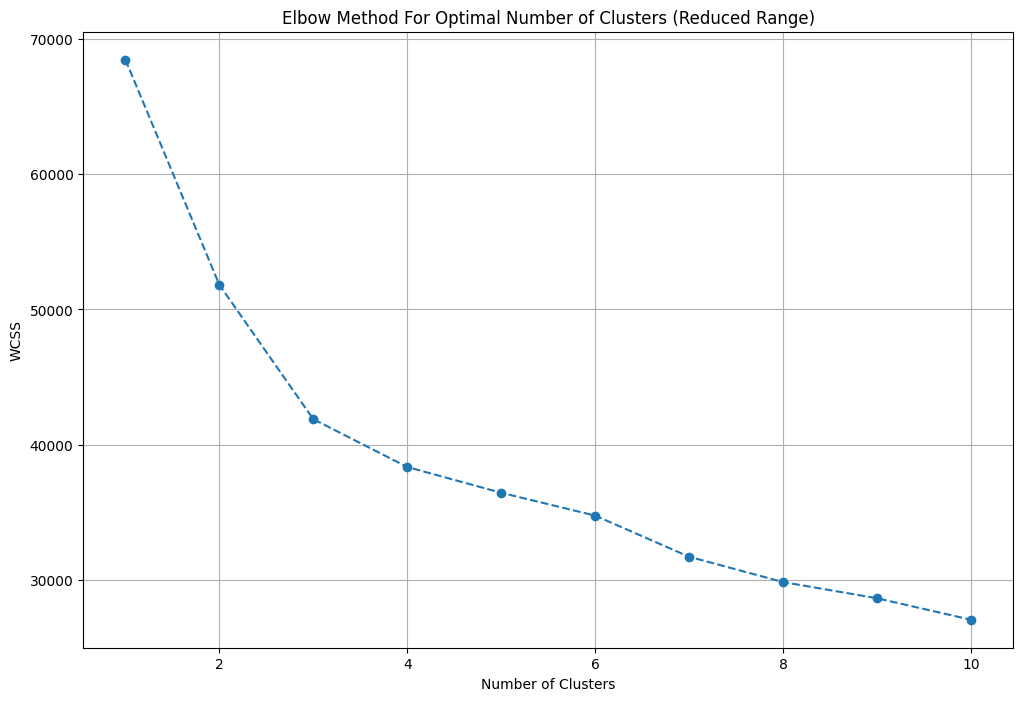

In [52]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [53]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [54]:
df = df.iloc[:,:-18]

In [55]:
df['furnishing_type'] = cluster_assignments

In [56]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnishe

,furnishDetails,furnishing_type
920,NaN,0
1402,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
1963,"['6 Fan', '7 Light', '8 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
2634,[],0
2265,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0


# 5.features

In [57]:
df[['society','features']].sample(5)

,society,features
3246,mvn athens,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting']"
1965,sapphire eighty three,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Visitor Parking', 'Natural Light', 'Shopping Centre', 'Fitness Centre / GYM']"
182,independent,NaN
496,signature the roselia,"['Security / Fire Alarm', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
367,dlf new town heights,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [58]:
df['features'].isnull().sum()

635

In [60]:
import pandas as pd
app_df = pd.read_csv("C:\\Users\\Dell\\Downloads\\appartments.csv")
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [61]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [62]:
temp_df = df[df['features'].isnull()]

In [63]:
temp_df.shape

(635, 26)

In [64]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [65]:
df.loc[temp_df.index,'features'] = x.values

In [66]:
df['features'].isnull().sum()


481

In [67]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [68]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [69]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
872,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
855,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0


In [70]:
features_binary_df.shape

(3803, 130)

In [72]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

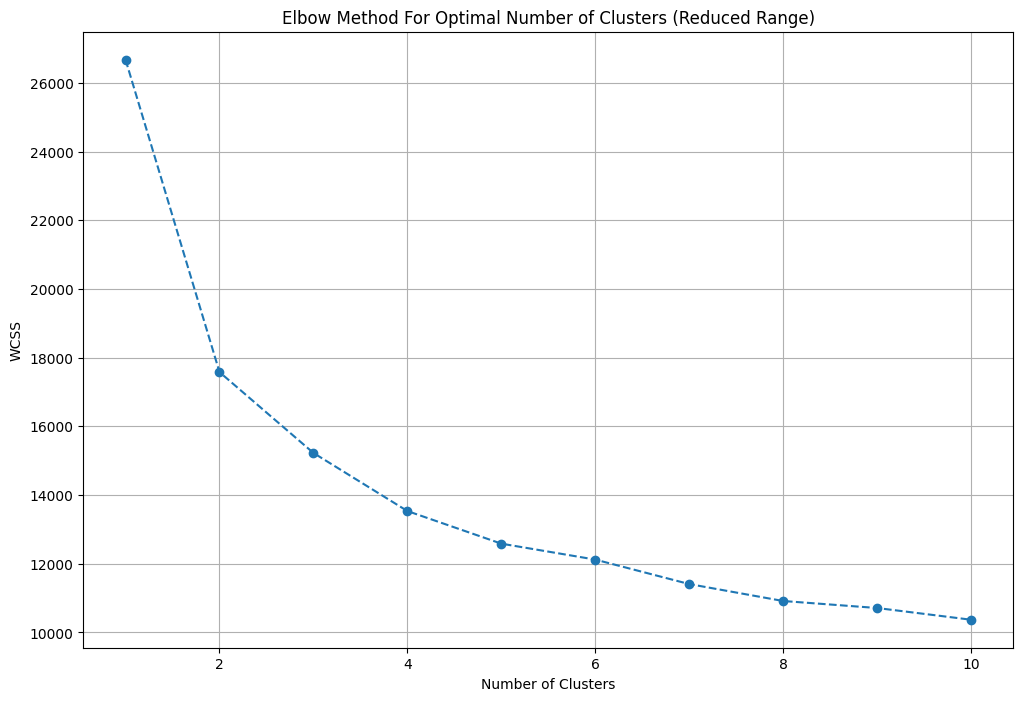

In [73]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [74]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [75]:
df['luxury_score'] = luxury_score

In [76]:
df.head()


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,ss residency,sector 6,0.48,5333.0,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,not available,2.0,NaN,Moderately Old,"['Hanuman Mandir', 'Dental Health Centre', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Lall Nursing and Maternity Home', 'Om Charitable Dental & Implant Centre', 'Lall Eye Care Centre', 'M Goel Hospital', 'Dentecare - Multispeciality Dental Clinic', 'Kharbanda Maternity and Nursing Home', 'Lalit Dental Care', 'Ahooja Eye and Dental Institute Hospital', 'Gupta Hospital Gurgaon', 'Dr. Sandeep Chauhan', 'Jackson Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Dr. Sarvejeet Singh', 'Sharma Hospital Gurgaon', 'Dr. Ajay S. Gupta Clinic', 'Mamta Hospital Gurgaon', 'Lotus Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Triveni Hospital Gurgaon', 'M.S Hospital', 'Bindal Clinic', 'My Care Clinic', 'Sparsh Hospital Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Saraswati Hospital Gurgaon', 'GH Gurgaon', 'Aarvy Hospital', 'Nidhi Clinic', 'Aryan Hospital', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Swastik Maternity and Medical Centre', 'Dr. Tomar Clinic', 'Dr. Babita Sharma', 'Indian Oil', 'Rang Parivartan', 'Punjab national bank', 'State bank of india sbi', 'State bank of india', 'Dronacharya Government College', 'govt sec school', 'District library gurgaon']",[],"['Security / Fire Alarm', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors']",NaN,NaN,100.0,0,0,0,0,0,0,"[Security / Fire Alarm, False Ceiling Lighting, Water Storage, No open drainage around, Natural Light, Internet/wi-fi connectivity, Airy Rooms, Spacious Interiors]",54
1,flat,ansal housing highland park,sector 103,1.10,6242.0,1762.0,Super Built up area 1762(163.7 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),3,3,3+,not available,7.0,North-East,New Property,"['Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Prateek Nursing Home And Polyclinic', 'Esic Hospital Gurugram', 'Kr Dental Hub', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1762.0,1500.0,1300.0,0,0,0,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Separate entry for servant room, Visitor Parking, Swimming Pool, Park, Shopping Centre, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center, Water softening plant]",87
2,flat,sapphire eighty three,sector 83,0.65,9286.0,700.0,Built Up area: 700 (65.03 sq.m.),1,1,0,not available,6.0,NaN,Undefined,"['S.R.S. Hospital and Critical Care Unit', 'Orris Community Center', 'Petrol Pump Indian Oil', 'Petrol Pump Indian Oil', 'Petrol Pump', 'Essar Petrol Pump', 'Haldiram', 'KFC', 'Rao Dhaba', 'Pizza Hut', ""McDonald's""]","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,70

In [77]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [78]:
df.sample(5)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1434,flat,apex our homes,sector 37c,0.35,3783.0,925.0,Super Built up area 925(85.94 sq.m.)Built Up area: 850 sq.ft. (78.97 sq.m.)Carpet area: 800 sq.ft. (74.32 sq.m.),2,2,1,7.0,East,Relatively New,925.0,850.0,800.00000,0,0,0,0,0,1,158
2949,flat,signature global orchard avenue,sector 93,0.36,6715.0,536.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,6.0,North,Relatively New,NaN,NaN,543.57695,0,0,0,0,0,0,16
1977,flat,puri emerald bay,sector 104,1.80,8823.0,2040.0,Super Built up area 1700(157.94 sq.m.),2,3,3,23.0,NaN,New Property,1700.0,NaN,NaN,0,1,0,0,0,0,36
2716,flat,eldeco accolade,sohna road,1.14,6530.0,1746.0,Super Built up area 1751(162.67 sq.m.)Carpet area: 1062 sq.ft. (98.66 sq.m.),3,3,3+,4.0,East,Relatively New,1751.0,NaN,1062.00000,0,0,0,0,0,0,157
613,flat,imperia the esfera,sector 37c,0.98,5399.0,1815.0,Super Built up area 1815(168.62 sq.m.)Carpet area: 1510 sq.ft. (140.28 sq.m.),3,4,3,9.0,South-West,Relatively New,1815.0,NaN,1510.00000,0,1,0,0,1,0,49


In [79]:
df.shape

(3803, 23)

In [80]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)